In [1]:
import torch
import numpy as np
import pylab as plt
%matplotlib inline

In [5]:
import sys
sys.path.append('../')

In [2]:
%load_ext autoreload
%autoreload 1

In [50]:
%aimport log_plotter
from log_plotter import get_run_names, get_data, get_data_pth, plot_smooth, plot_tag, plot_runs_and_tags, get_legend, plot_smooth_o1, plot_runs_and_tags_multi, plot_smooth_o5

In [3]:
save_single = False
plt.rcParams.update({'font.size': 12})

In [ ]:
save_single = True
plt.rcParams.update({'font.size': 16})

# linerg underparam

todo

# RF underparam

Jimmy (april 1):

diff between RF and R kitchen sinks? no diff

- random kitchen sinks and only learns the top layer weights. The label will also be generated by a teacher random kitchen sink. 
- vary the number of hidden units, d, in a random kitchen sink to simulate the three regimes: overparameterized (d >>n) vs under parameterized (n >>d) vs right at the interpolation threshold (n ~= d). 
- ?d >>n, non of the variance reduction methods matter, we verified this hypothesis on linear models
not sure about this that we have verified it
- what is the metric? risk/var reduction
- stochastic setting? var reduction is observed even in linreg gamma=2 with snr=5 (high noise?)


1. S=2*T, D varies with H
2. D/H=gamma, vary teacher model
3. ?


- rate of convergence is the same in overparam, sgd is cheaper
- win in underparam, or interpolation
- when data is very noisy, like teacher more neurons
- optimal sampling for convergence, see what happens with noise and citations
- suspicion, if too underparam it won't work well either
- 1 neuron and multineuron example
- even cifar10 corrupt labels shows the same thing, corrupt labels reduces the power of model to overfit and brings it down to underparam

On when optimal sampling could help: https://arxiv.org/pdf/1412.0156.pdf

On when the bias and variance of deep learning models: https://arxiv.org/pdf/2002.11328.pdf

params:
- h_s: student hidden
- h_t: teacher hidden
- n: number of training data
- d: input dim


1. h_t/h_s=2 (underparam), vary n
2. n/h_s=2 (underparam), vary h_t

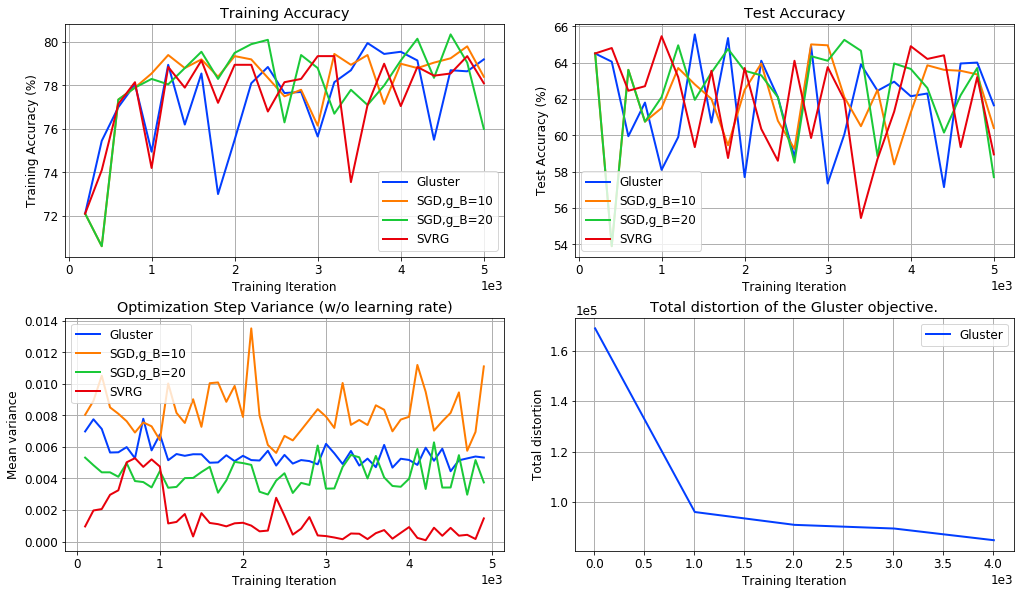

In [48]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_rf_gvar/.*train_data_2000,.*teacher_hidden_2000,.*student_hidden_500']  # (?!.*scheduler)
tag_names = ['Tacc', 'Vacc', 'est_var', 'gb_td']
fig_name = 'figs_underparam/rf.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_batch_size']  # g_estim, 'g_nclusters', 
ylim = [None]*20
# ylim = [None, None, [0, 1e-3], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

* clear overparam: n=500,ht=500,hs=2000, variance=0, train acc=100
* clear underparam: n=2000,ht=2000,hs=500, V_gluster=V_2B, V_SVRG < all, train acc=80
* ?interpolation threshold: n=500,ht=500,hs=500, V~=0, V_SVRG < all, train acc=100


* looks like underparam is good but no accuracy improvement after epoch 1
* Gluster for RF is clustering data in a randomly transformed space

TODO:
* learning rate?
* aggregate plots
* if SGC is true for overparam, what goes wrong? https://www.cs.ubc.ca/~schmidtm/Documents/2020_Vector_SmallResidual.pdf

# Aggregate plots

## svrg

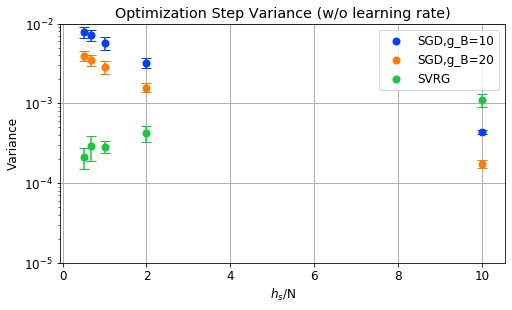

In [169]:
plot_f = plt.scatter
# plot_f = plot_smooth_o1  # plot_smooth_o5
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_rf_gvar_hs1000/.*lr_0.001,(.*estim_svrg|.*estim_sgd)']  # (?!.*scheduler) .*estim_svrg|
plot_tags = ['est_var']
x_tags = ['student_hidden/num_train_data']  # 'student_hidden/teacher_hidden' 'teacher_hidden/num_train_data', 
y_tags = [None, None]
lg_tags = [['estim_', 'g_batch_size'], ['estim_', 'g_batch_size']]
fig_name = 'figs_underparam/rf_agg.png'
# ylim = [[0, 1e-2], [0, 1e-2]]
ylim = [[1e-5, 1e-2], [1e-5, 1e-2]]
# ylim = [None]*20
ncolor = 4
no_title = False
lg_replace = [('estim_', ''), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags_multi(plot_f, logdir, patterns, plot_tags, x_tags, y_tags, lg_tags, fig_name, ylim, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

## gluster

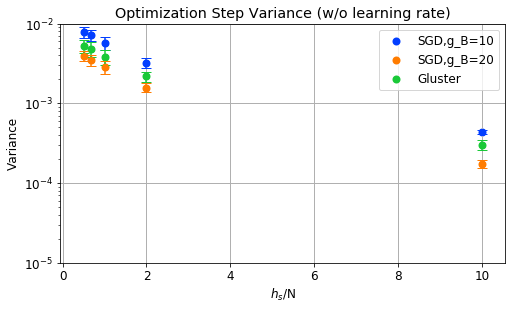

In [172]:
plot_f = plt.scatter
# plot_f = plot_smooth_o1  # plot_smooth_o5
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_rf_gvar_hs1000/.*lr_0.001,(.*estim_gluster|.*estim_sgd)']  # (?!.*scheduler) .*estim_svrg|
plot_tags = ['est_var']
x_tags = ['student_hidden/num_train_data']  # 'student_hidden/teacher_hidden' 'teacher_hidden/num_train_data', 
y_tags = [None, None]
lg_tags = [['estim_', 'g_batch_size'], ['estim_', 'g_batch_size']]
fig_name = 'figs_underparam/rf_agg.png'
# ylim = [[0, 1e-2], [0, 1e-2]]
ylim = [[1e-5, 1e-2], [1e-5, 1e-2]]
# ylim = [None]*20
ncolor = 4
no_title = False
lg_replace = [('estim_', ''), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags_multi(plot_f, logdir, patterns, plot_tags, x_tags, y_tags, lg_tags, fig_name, ylim, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

* hs/N, error bars are small which shows variance is indep of teacher hidden, only depends on hs/N
* SVRG hs/N, for small lr it is better than B
  - lr=0.001, far below 2B below hs/N=2, above B on 10
  - lr=0.01, above B after hs/N=1, below 2B before
  - lr=0.1, always above B
* Gluster hs/N
  - lr=0.001, Gluster always better than B but never better than 2B
  - lr=0.01, Gluster always better than B but never better than 2B
  - lr=0.1, Gluster is worse than B below hs/N=1 and above, it is equal to B at 1
* variance of overparametrized 10 is really small, it becomes smaller with larger lr

David (Apr 9):
* plot hs/ht for fix N
* small variance in overparam, no point in variance reduction
* normalized variance
* rare classes (needs reweighting)
* why svrg worse in overparam and lr=0.001: bc high variance at the beginning (end variance better than mean?)
* never worse than plain sgd

TODO:
* fixed number of runs per hs/N
* error bars are bigger for highly underparam
* multiple seeds (definitely need)
* momentum=0
* mean/end variance?
  - let's try after the first update, then 80% of train
  - both mean and max (gluster's spikes)

# Aggregate mean 80%, max 80%

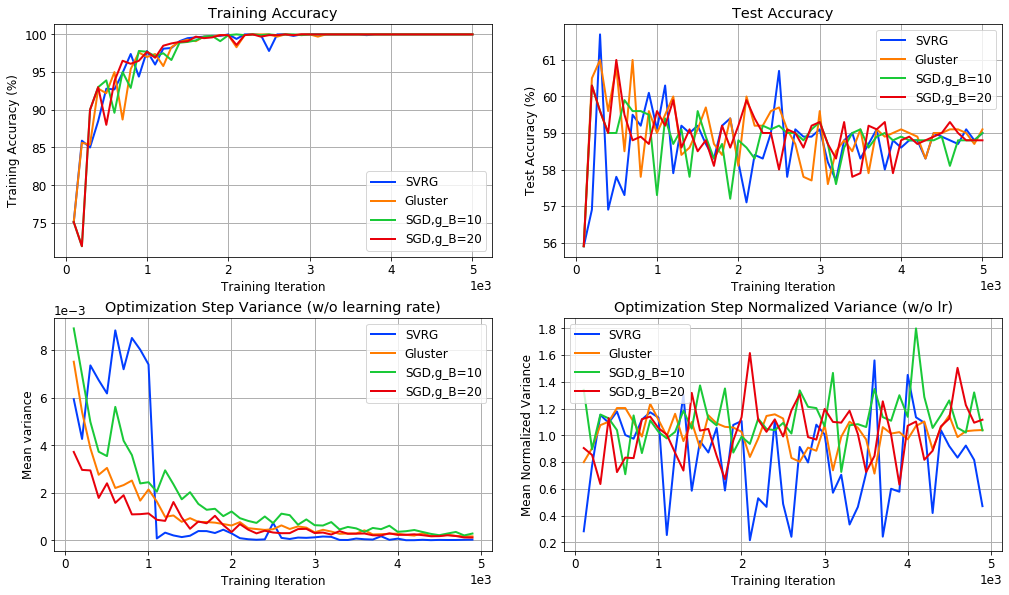

In [278]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_rf_gvar_hs1000/.*lr_0.01,.*train_data_1000,.*teacher_hidden_500,.*student_hidden_1000']  # (?!.*scheduler)
tag_names = ['Tacc', 'Vacc', 'est_var', 'est_nvar']
fig_name = 'figs_underparam/rf.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_batch_size']  # g_estim, 'g_nclusters', 
ylim = [None]*20
# ylim = [None, None, [0, 1e-3], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

## svrg

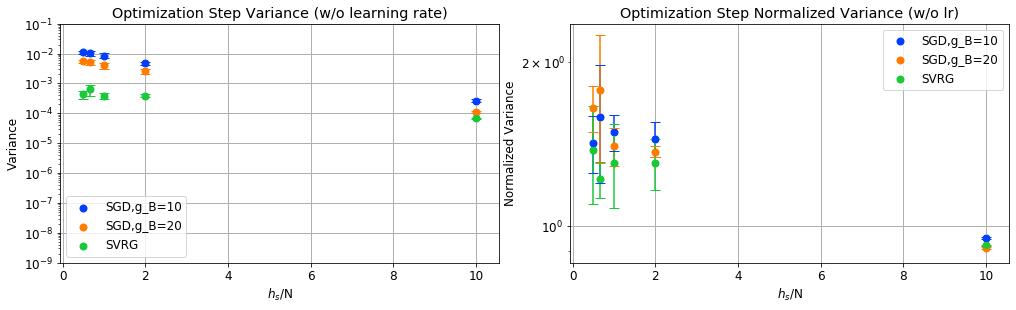

In [220]:
plot_f = plt.scatter
# plot_f = plot_smooth_o1  # plot_smooth_o5
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_rf_gvar_hs1000/.*lr_0.001,(.*estim_svrg|.*estim_sgd)']  # (?!.*scheduler) (.*estim_gluster|.*estim_sgd) .*num_train_data_100, (?!.*teacher_hidden_500,)
plot_tags = ['est_var', 'est_nvar']
x_tags = ['student_hidden/num_train_data', 'student_hidden/num_train_data']  # 'student_hidden/teacher_hidden' 'teacher_hidden/num_train_data', 
y_tags = [None, None]
lg_tags = [['estim_', 'g_batch_size'], ['estim_', 'g_batch_size']]
fig_name = 'figs_underparam/rf_agg.png'
# ylim = [[0, 1e-2], [0, 1e-2]]
ylim = [[1e-9, 1e-1], None]
# ylim = [None]*20
ncolor = 4
no_title = False
agg_type = 'max_80'
lg_replace = [('estim_', ''), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags_multi(plot_f, logdir, patterns, plot_tags, x_tags, y_tags, lg_tags, fig_name, ylim, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title, agg_type=agg_type)

## gluster

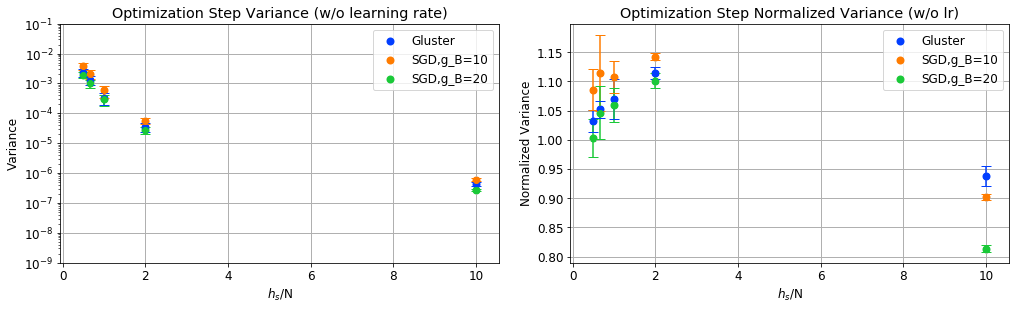

In [263]:
plot_f = plt.scatter
# plot_f = plot_smooth_o1  # plot_smooth_o5
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_rf_gvar_hs1000/.*lr_0.01,(.*estim_gluster|.*estim_sgd)']  # (?!.*scheduler) (.*estim_gluster|.*estim_sgd) .*num_train_data_100, (?!.*teacher_hidden_500,)
plot_tags = ['est_var', 'est_nvar']
x_tags = ['student_hidden/num_train_data', 'student_hidden/num_train_data']  # 'student_hidden/teacher_hidden' 'teacher_hidden/num_train_data', 
y_tags = [None, None]
lg_tags = [['estim_', 'g_batch_size'], ['estim_', 'g_batch_size']]
fig_name = 'figs_underparam/rf_agg.png'
# ylim = [[0, 1e-2], [0, 1e-2]]
ylim = [[1e-9, 1e-1], None]
# ylim = [None]*20
ncolor = 4
no_title = False
agg_type = 'mean_80'
lg_replace = [('estim_', ''), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags_multi(plot_f, logdir, patterns, plot_tags, x_tags, y_tags, lg_tags, fig_name, ylim, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title, agg_type=agg_type)

N > hs > ht: 1500, 1000, 500
- hs/N=1/1.5 underparam
- hs/ht=2 overparam
- sgd B particularly high mean variance

Gluster:
- N/hs=1: most spiky
- it is cluster the inputs, why is it anything good?

svrg:
- svrg always reduces variance if we ignore first 20% of training
- in overparam, svrg is giving lower variance but we don't need it
- normalized variance is not smaller than 2B in overparam

* keeping hs fixed simplifies the fact that the gradients are in the same space. it is only the complexity of the problem that changes.

# momentum=0, hs/N

## sanity check

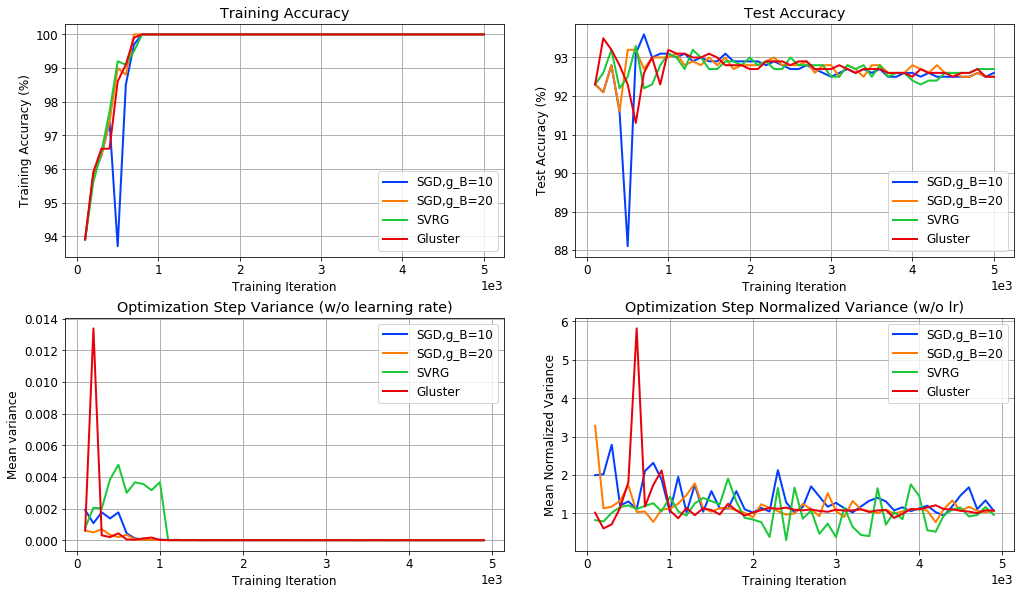

In [345]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_rf_gvar_hs1000_hsN/.*lr_0.1,.*seed_123,.*dim_100,.*student_hidden_1000,.*train_data_1000,.*teacher_hidden_1000']  # (?!.*scheduler)
tag_names = ['Tacc', 'Vacc', 'est_var', 'est_nvar']
fig_name = 'figs_underparam/rf.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_batch_size']  # g_estim, 'g_nclusters', 
ylim = [None]*20
# ylim = [None, None, [0, 1e-3], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

## lr 1e-3

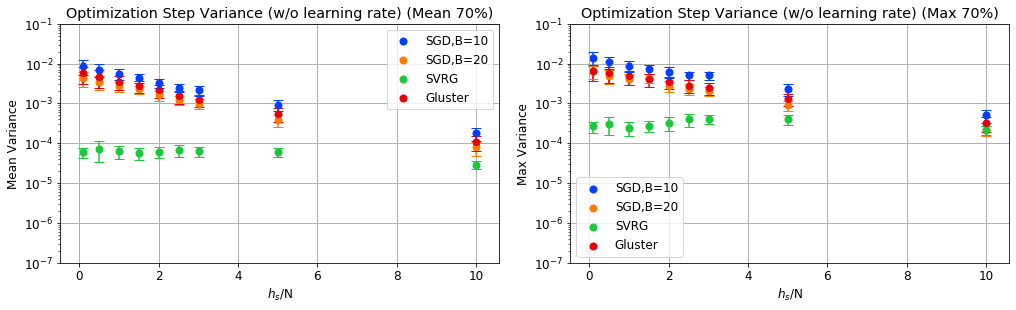

In [371]:
plot_f = plt.scatter
# plot_f = plot_smooth_o1  # plot_smooth_o5
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_rf_gvar_hs1000_hsN/.*lr_0.001,']  # (?!.*scheduler) (.*estim_gluster|.*estim_sgd) .*num_train_data_100, (?!.*teacher_hidden_500,)
plot_tags = ['est_var', 'est_var']  # , 'est_nvar'
x_tags = ['student_hidden/num_train_data', 'student_hidden/num_train_data']  # 'student_hidden/teacher_hidden' 'teacher_hidden/num_train_data', 
y_tags = [None, None]
lg_tags = [['estim_', 'g_batch_size'], ['estim_', 'g_batch_size']]
fig_name = 'figs_underparam/rf_agg_lr0.001.png'
# ylim = [[0, 1e-2], [0, 1e-2]]
ylim = [[1e-7, 1e-1], [1e-7, 1e-1]]
# ylim = [None]*20
ncolor = 4
no_title = False
agg_types = ['mean_70', 'max_70']
lg_replace = [('estim_', ''), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('g_batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags_multi(plot_f, logdir, patterns, plot_tags, x_tags, y_tags, lg_tags, fig_name, ylim, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title, agg_types=agg_types)

## lr 1e-2

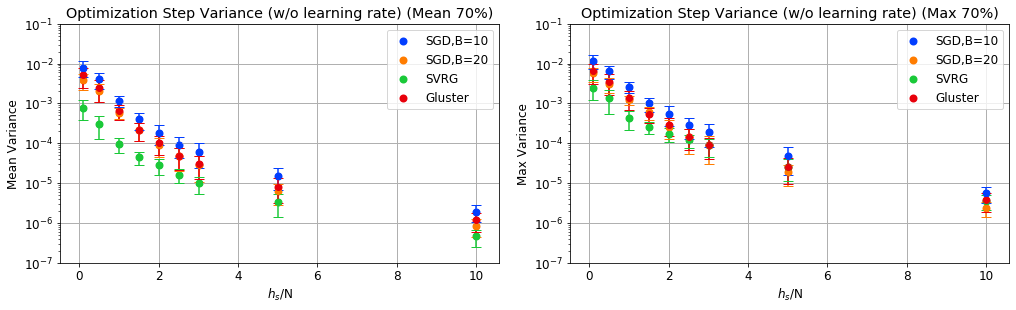

In [372]:
plot_f = plt.scatter
# plot_f = plot_smooth_o1  # plot_smooth_o5
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_rf_gvar_hs1000_hsN/.*lr_0.01,']  # (?!.*scheduler) (.*estim_gluster|.*estim_sgd) .*num_train_data_100, (?!.*teacher_hidden_500,)
plot_tags = ['est_var', 'est_var']
x_tags = ['student_hidden/num_train_data', 'student_hidden/num_train_data']  # 'student_hidden/teacher_hidden' 'teacher_hidden/num_train_data', 
y_tags = [None, None]
lg_tags = [['estim_', 'g_batch_size'], ['estim_', 'g_batch_size']]
fig_name = 'figs_underparam/rf_agg_lr0.01.png'
# ylim = [[0, 1e-2], [0, 1e-2]]
ylim = [[1e-7, 1e-1], [1e-7, 1e-1]]
# ylim = [None]*20
ncolor = 4
no_title = False
agg_types = ['mean_70', 'max_70']
lg_replace = [('estim_', ''), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('g_batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags_multi(plot_f, logdir, patterns, plot_tags, x_tags, y_tags, lg_tags, fig_name, ylim, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title, agg_types=agg_types)

## lr 1e-1

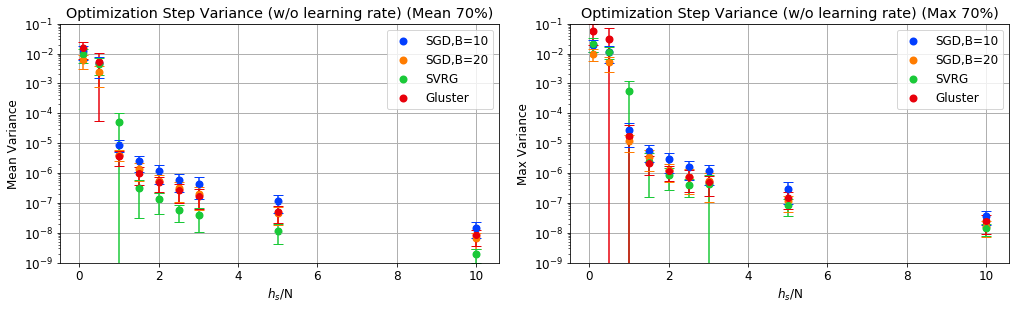

In [373]:
plot_f = plt.scatter
# plot_f = plot_smooth_o1  # plot_smooth_o5
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_rf_gvar_hs1000_hsN/.*lr_0.1,']  # (?!.*scheduler) (.*estim_gluster|.*estim_sgd) .*num_train_data_100, (?!.*teacher_hidden_500,)
plot_tags = ['est_var', 'est_var']
x_tags = ['student_hidden/num_train_data', 'student_hidden/num_train_data']  # 'student_hidden/teacher_hidden' 'teacher_hidden/num_train_data', 
y_tags = [None, None]
lg_tags = [['estim_', 'g_batch_size'], ['estim_', 'g_batch_size']]
fig_name = 'figs_underparam/rf_agg_lr0.1.png'
# ylim = [[0, 1e-2], [0, 1e-2]]
ylim = [[1e-9, 1e-1], [1e-9, 1e-1]]
# ylim = [None]*20
ncolor = 4
no_title = False
agg_types = ['mean_70', 'max_70']
lg_replace = [('estim_', ''), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('g_batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags_multi(plot_f, logdir, patterns, plot_tags, x_tags, y_tags, lg_tags, fig_name, ylim, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title, agg_types=agg_types)

## sgd

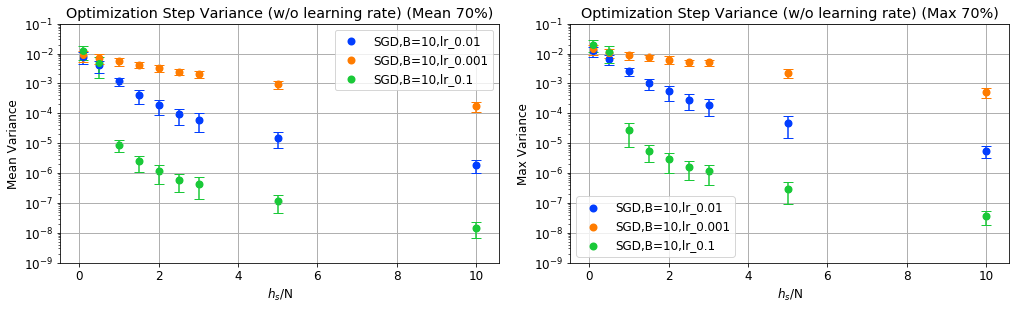

In [374]:
plot_f = plt.scatter
# plot_f = plot_smooth_o1  # plot_smooth_o5
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_rf_gvar_hs1000_hsN/.*estim_sgd.*g_batch_size_10']  # (?!.*scheduler) (.*estim_gluster|.*estim_sgd) .*num_train_data_100, (?!.*teacher_hidden_500,)
plot_tags = ['est_var', 'est_var']
x_tags = ['student_hidden/num_train_data', 'student_hidden/num_train_data']  # 'student_hidden/teacher_hidden' 'teacher_hidden/num_train_data', 
y_tags = [None, None]
lg_tags = [['estim_', 'g_batch_size', 'lr'], ['estim_', 'g_batch_size', 'lr']]
fig_name = 'figs_underparam/rf_agg_sgd.png'
# ylim = [[0, 1e-2], [0, 1e-2]]
ylim = [[1e-9, 1e-1], [1e-9, 1e-1]]
# ylim = [None]*20
ncolor = 4
no_title = False
agg_types = ['mean_70', 'max_70']
lg_replace = [('estim_', ''), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('g_batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags_multi(plot_f, logdir, patterns, plot_tags, x_tags, y_tags, lg_tags, fig_name, ylim, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title, agg_types=agg_types)

* consistent with old runs, except we don't have lr=0.1, so everything is nice
* again indep of teacher hidden, bc random features? true for gluster, but why svrg?
* the argument that variance is already small doesn't work because multiple of batch size up to a point reduces variance and gives speedup
* dim=100 has lower variance in general compared to dim=10000
* normalized variance is spiky for all
* again, we are looking at only last 80%, that helps svrg for lr=0.01 and above
* the long error bars exist but more wrong with log scale
* dim=100,10000 are different

2.5h to run ~700 runs, 5 jobs per gpu

TODO:
* hs/N=5,10
* lr=0.1
* dim=1000, ht=1000
* separate dim=100,10000,

(Apr 11)

Conclusions:
- It looks like we need more overparametrization for Gluster to work but too much overpamaterization leaves no room for variance reduction.
- Gluster seem to be as good as SGD-2B with mild overparametrization (1-4).
- Gluster and SVRG are both unstable with large learning rate in underparametrized regime (<=1).
- In highly overparametrized regime (10), the gain from SVRG vanishes.
- Here are rough overparametrization coefficients I had been working with (not accounting for data augmentation):
  + MNIST CNN: 37, MLP: 31  (consistent variance reduction below SGD-2B)
  + CIFAR-10 Resnet8: 3, Resnet32: 9 (unstable variance reduction)
  + ImageNet ResNet18: 10 (consistently no variance reduction)
- If we account for data augmentation, assuming each training data gives us at least 10 new data points, all models I tried on CIFAR-10 and ImageNet are underparametrized.

More observations:
- The only hyperparameters that affect the variance are learning rate and the ratio of student_hidden/num_train_data. Each dot is an average over all other hyperparameters. Small error bars show that other hyperpameters do not matter.
- Contrary to our expectation, the ratio student_hidden/teacher_hidden does not affect the variance of the gradient.
- Gluster is always between SGD-B (same mini-batch size) and SGD-2B (double mini-batch size). Almost never worse than SGD-B, never better than SGD-2B.
- Gluster has high variance with large learning rate (0.1) in the underparametrized regime and the interpolation point.
- The gain of SVRG vanishes in the over-parametrized regime in 2 ways: 1) it provides less variance reduction 2) all methods have relatively low variance.
- One bonus plot: the variance of SGD for 3 learning rates together in plot shows that the variance of the gradient is smaller for larger learning rates and the gap grows as overparametrization grows.

Experimental setting:
- The random features (RF) model is a 2 layer binary classification model where the first layer weights are fixed. Only the second layer weights are trained. The first layer's activation is Relu and the model is trained with cross-entropy loss. Each random feature is sampled from a normal distribution and normalized to L2 norm 1.
- Data is generated from a Gaussian and labeled by a teacher RF model.
- We train a student RF model on this data.
- Important hyperparameters:
  + dim: Dimensionality of input
  + teacher_hidden
  + student_hidden
  + num_train_data
  + learning rate

How to read plots:
- There are 3 plots for 3 learning rates (0.1, 0.01, 0.001)
- The y-axis (in log-scale) is the mean/max variance over the last 70% of the training (this is to ignore the first epoch where SVRG and Gluster do not have a good variance estimate). Max plot should capture fluctuations of a variance estimator more.
- The x-axis is the over-parametrization coefficient (student_hidden/num_train_data). Each point is generated by keeping student_hidden fixed (1000) and varying num_train_data (in the range [0.1, 10]).
- We average over different values of the rest of hyperpameters:
  + Multiple random seeds (3)
  + teacher_hidden (0.1x and 10x student hidden)
  + input dim (0.1x and 10x student_hidden)
  + momentum=0
  + weight decay=1e-4

TODO:
* cifar10, imagenet overparam 1-4